<table width='100%'>
<tr>
<td style='background-color:white'>
    <p align="left">
    Part I<br>
        <b>Lab Machine Learning for Data Science</b><br>
    Summer Semester 2024
    </p>
</td>
<td style='background-color:white'>
    Evita Vardhani - 5587165<br>
    Hyeonhui Lee - 5585677<br>
    Jing Chen - 5582644<br>
</td>
</tr>
</table>

<br>
<center>
    <h1>Getting Insights into an Unsupervised Dataset</h1>
</center>
<br>

In [ ]:
!pip3 install dash
!pip3 install dash_bootstrap_components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 2.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

# 1. Loading the data, Preprocessing, Initial Data Analysis

## 1.1. Loading the data

In [ ]:
import requests
import zipfile
import io

url = 'https://archive.ics.uci.edu/static/public/292/wholesale+customers.zip'
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
with zip_file.open('Wholesale customers data.csv') as file:
    df = pd.read_csv(file)

In [ ]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 1.2. Preprocessing

In [ ]:
# Counting the number of missing values per column
print(df.isna().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
# Drop the metadata
X = df.drop("Channel", axis=1)
X = X.drop("Region", axis=1)

In [ ]:
# Convert it into numpy array
X_arr = np.array(X)

## 1.3. Initial Data Analysis

### 1.3.1. Plots

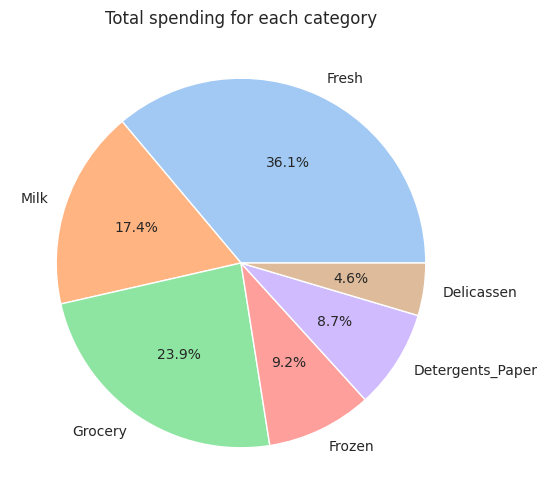

In [ ]:
categories = df.columns
array_customes = df.values
categories = np.array(categories)[2:]
array_customes =  np.delete(array_customes, [0, 1], axis=1)
total_spending = np.sum(array_customes,axis=0)
sns.set_style("darkgrid")
plt.figure(figsize=(6,6))
plt.pie(total_spending, labels=categories, autopct='%1.1f%%',colors=sns.color_palette("pastel"))
plt.title('Total spending for each category')
plt.show()

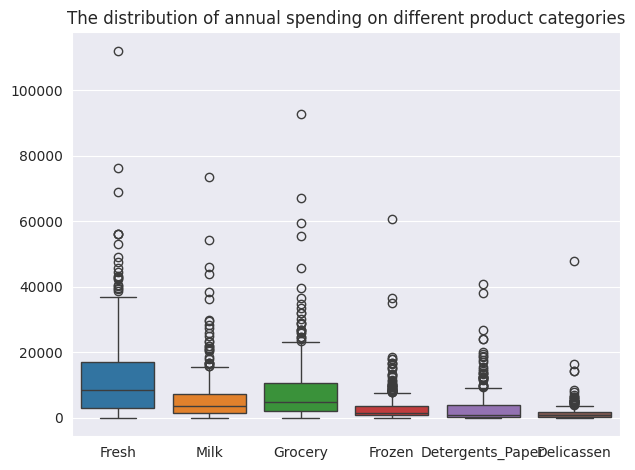

In [ ]:
sns.boxplot(data=df[categories])
plt.title('The distribution of annual spending on different product categories')
plt.tight_layout()
plt.show()

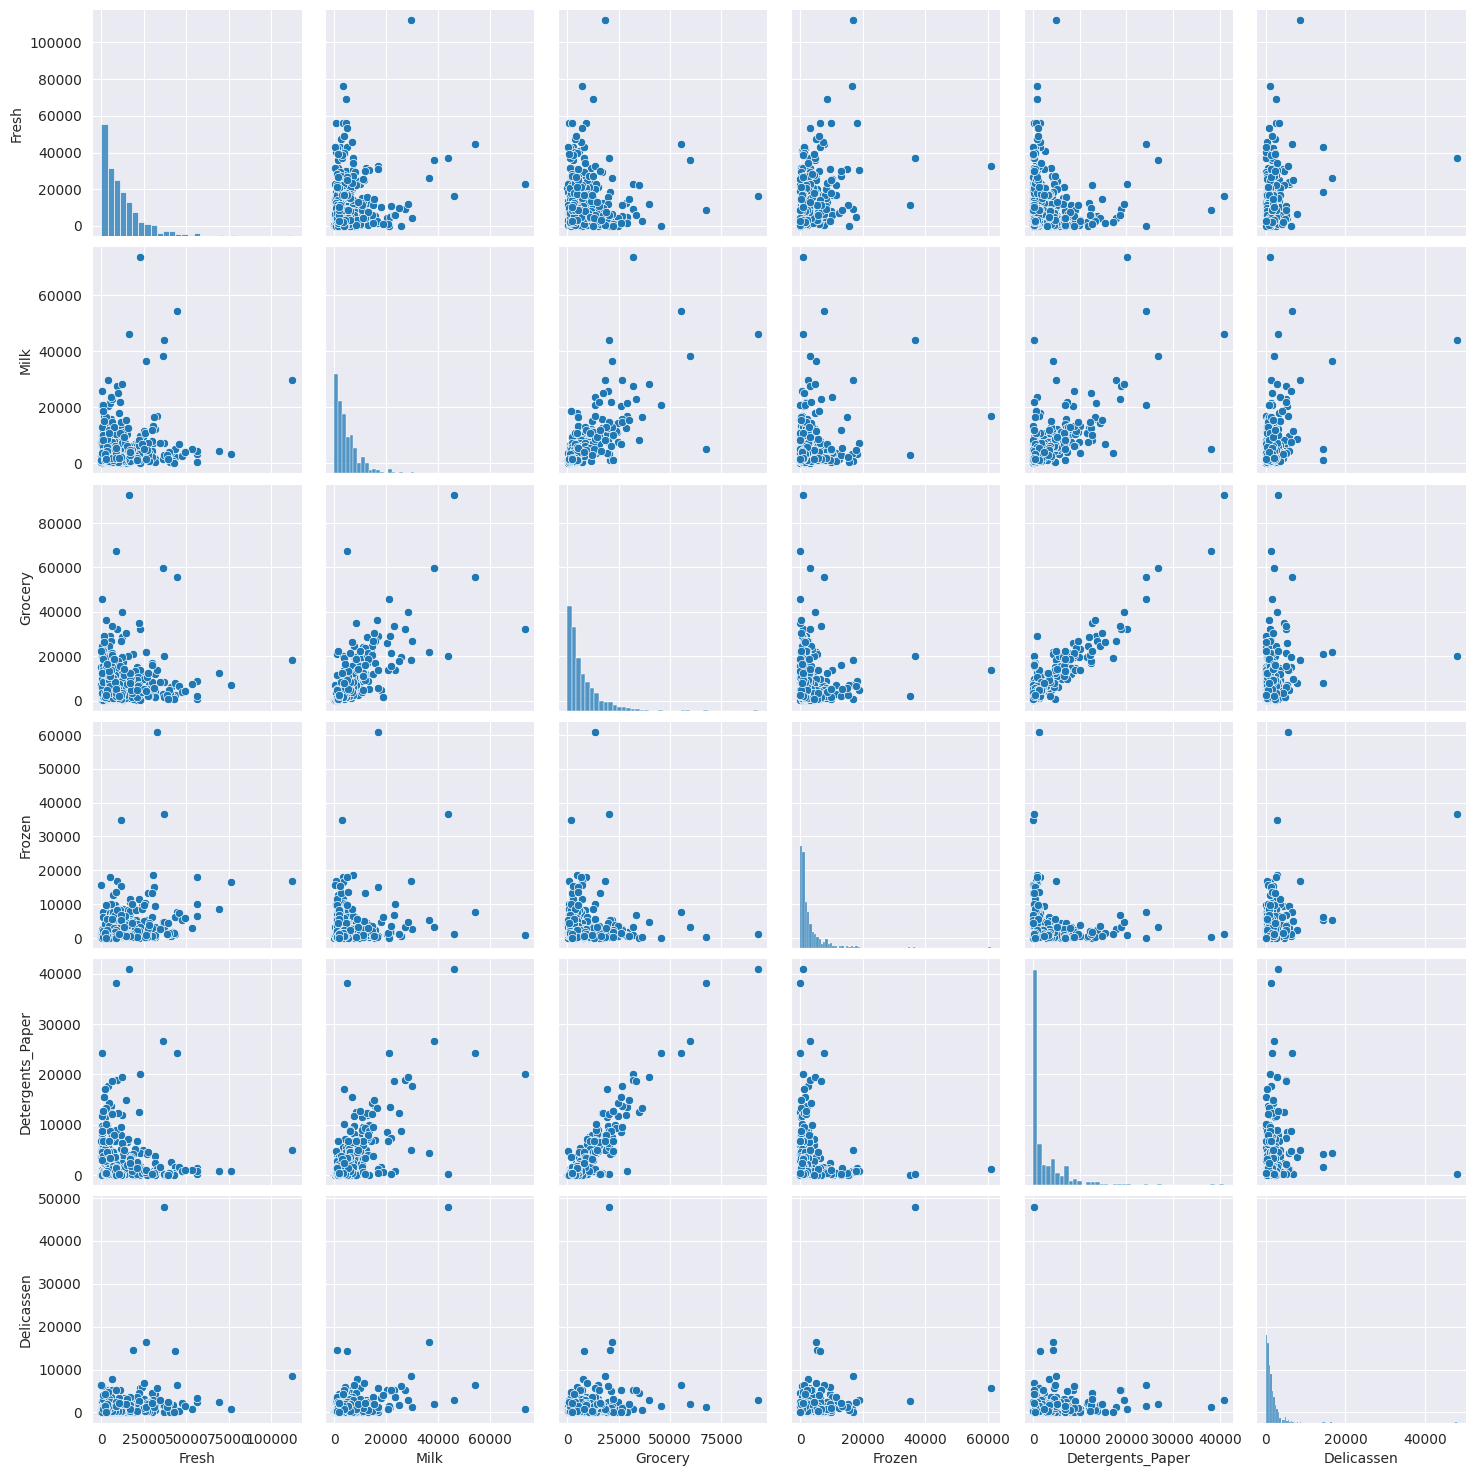

In [ ]:
sns.pairplot(data=X)

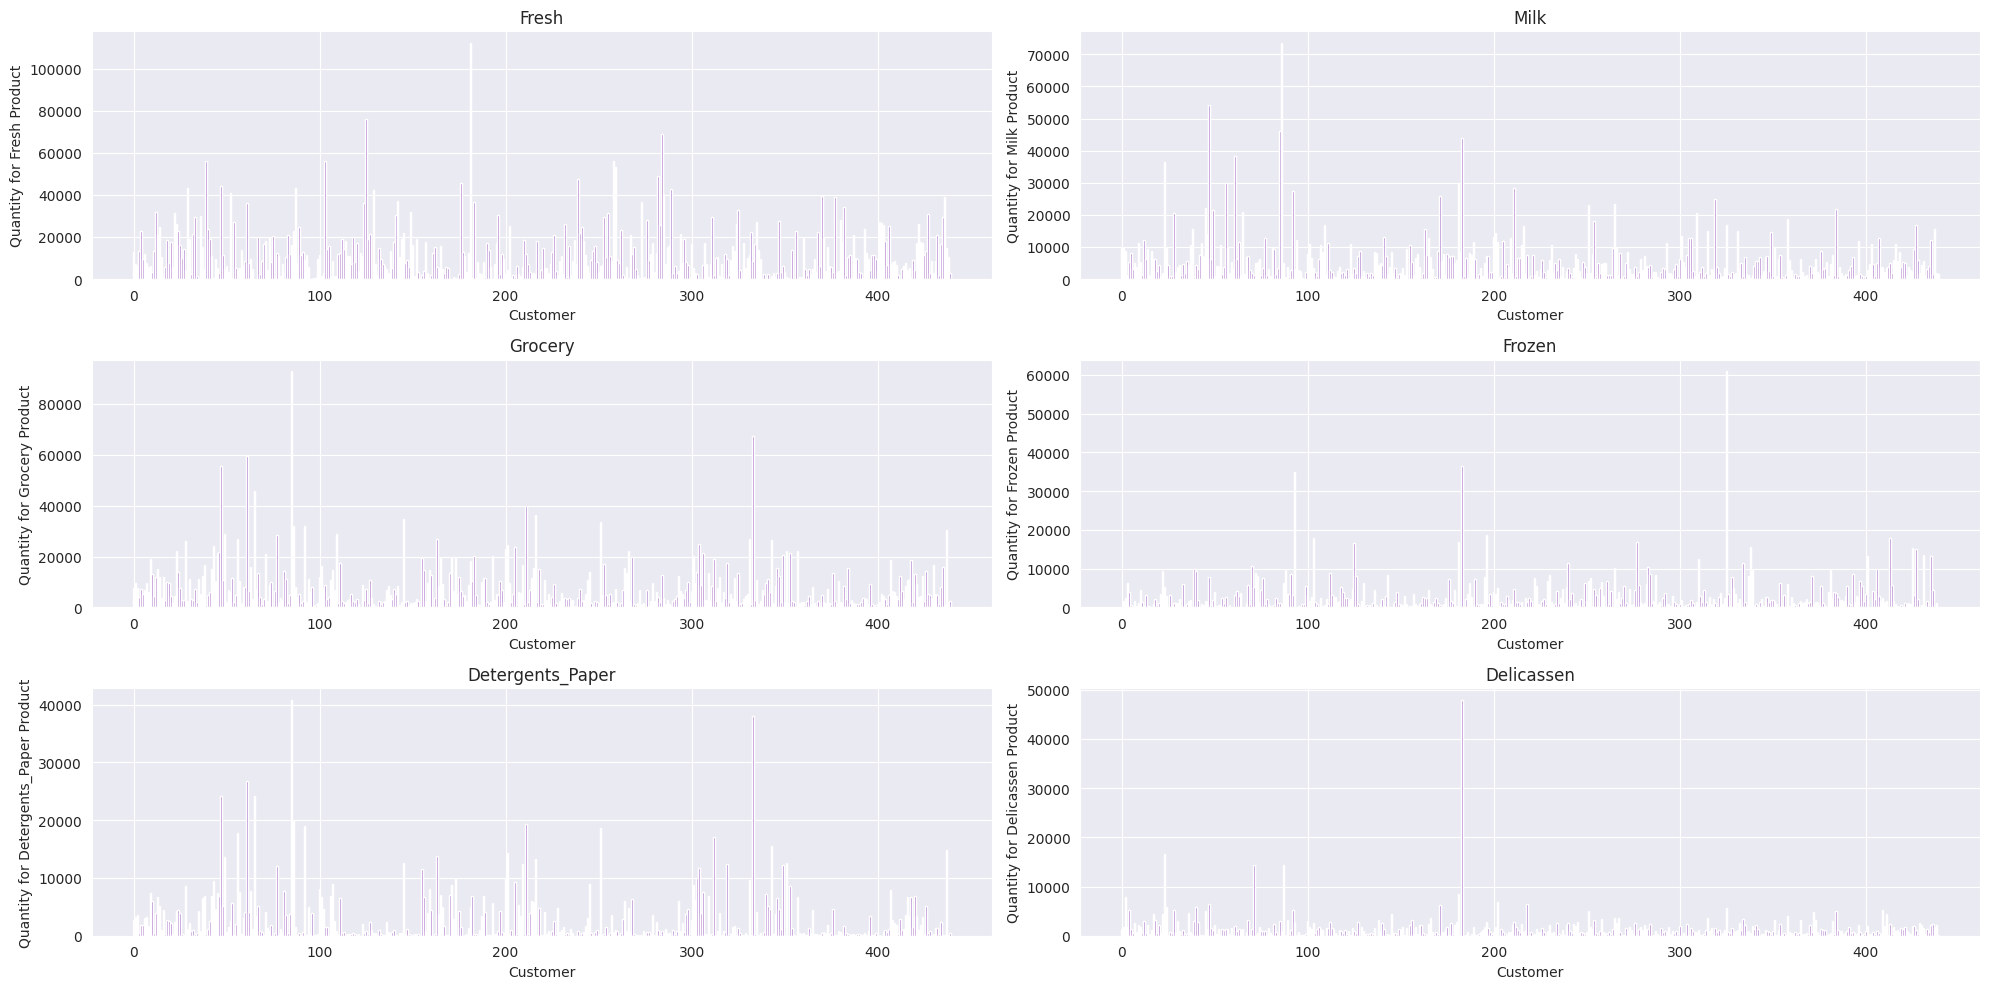

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
start_index=0
for idx, column_name in enumerate(X):
    if idx >= start_index:

        row = (idx-start_index) // 2
        col = (idx-start_index) % 2

        ax[row,col].bar(X[column_name].index, X[column_name], color='#AD78CB')
        ax[row,col].set_xlabel('Customer')
        ax[row,col].set_ylabel('Quantity for {} Product'.format(column_name))
        ax[row,col].set_title(column_name)

plt.tight_layout()
plt.show()

### 1.3.2. Non-linear transformation

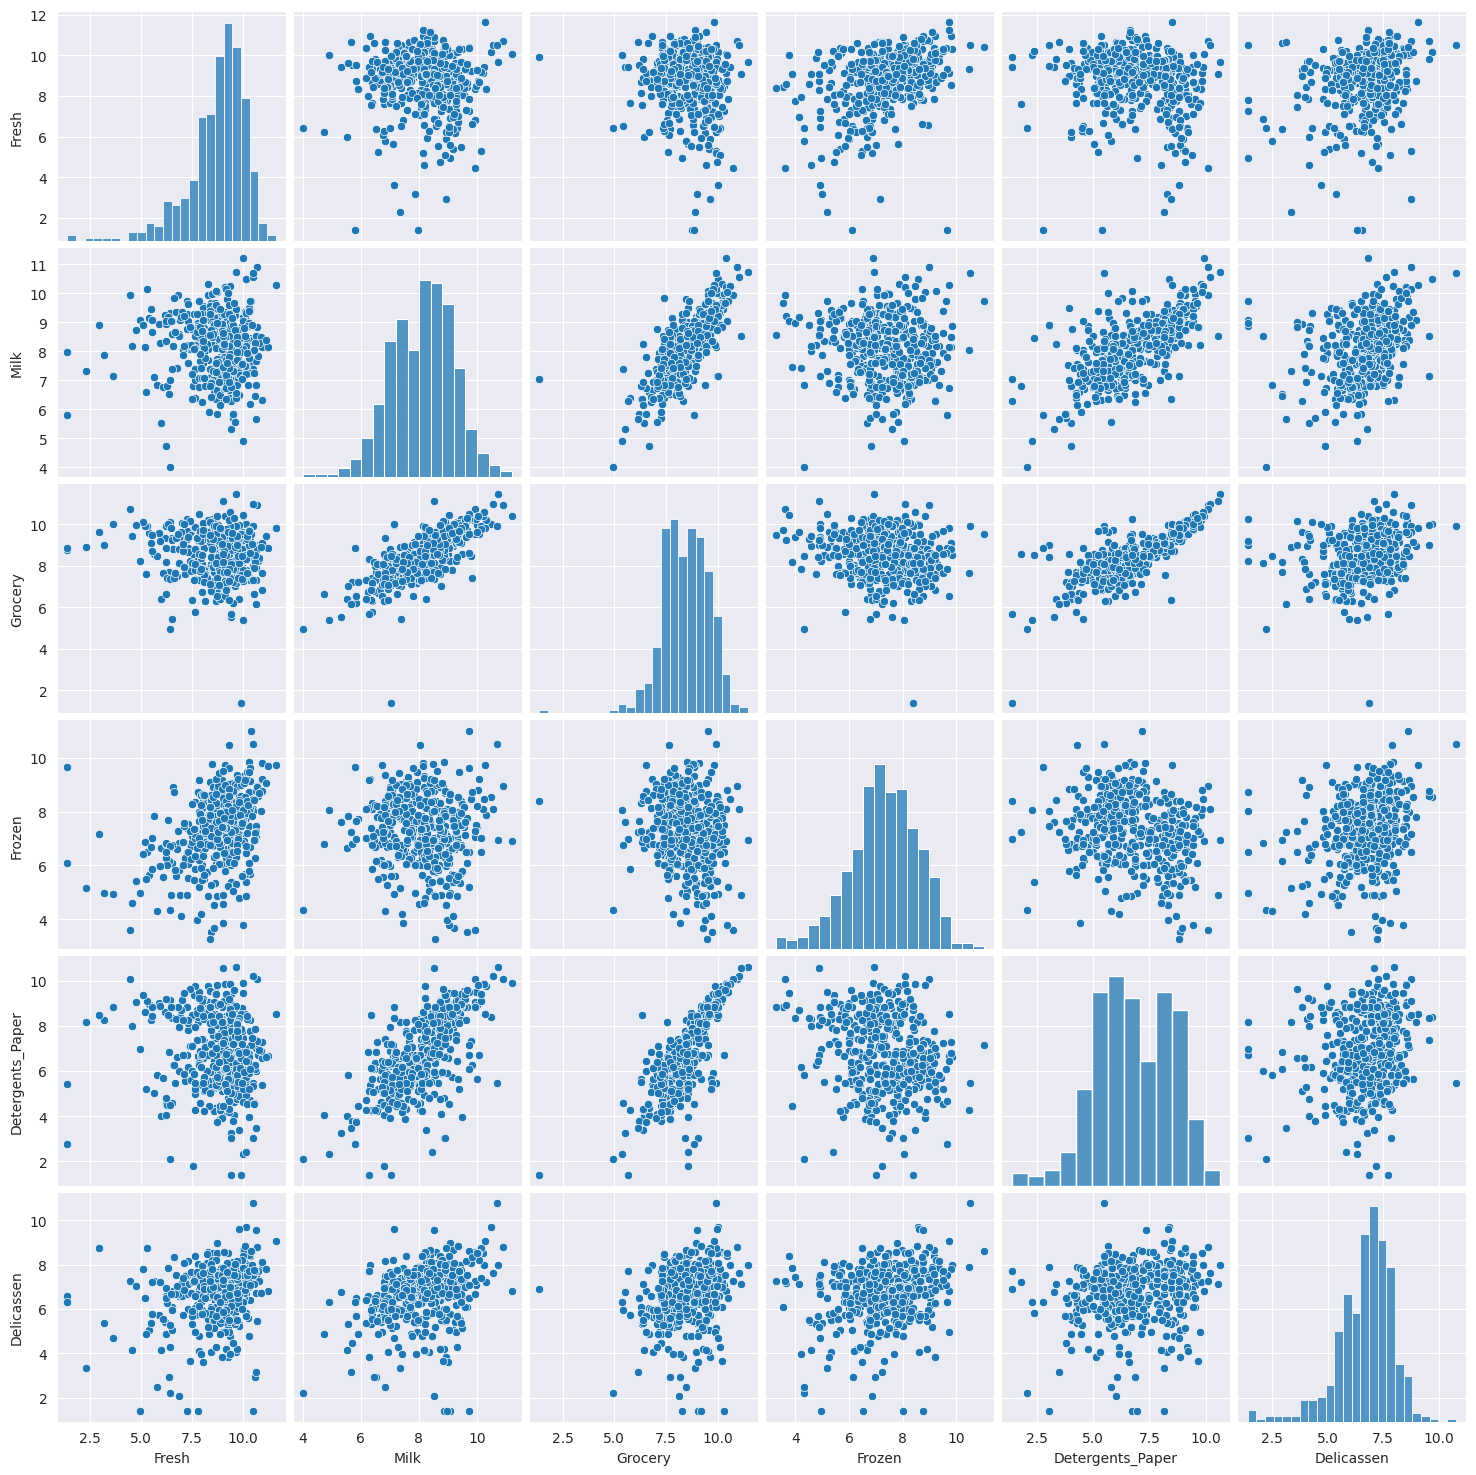

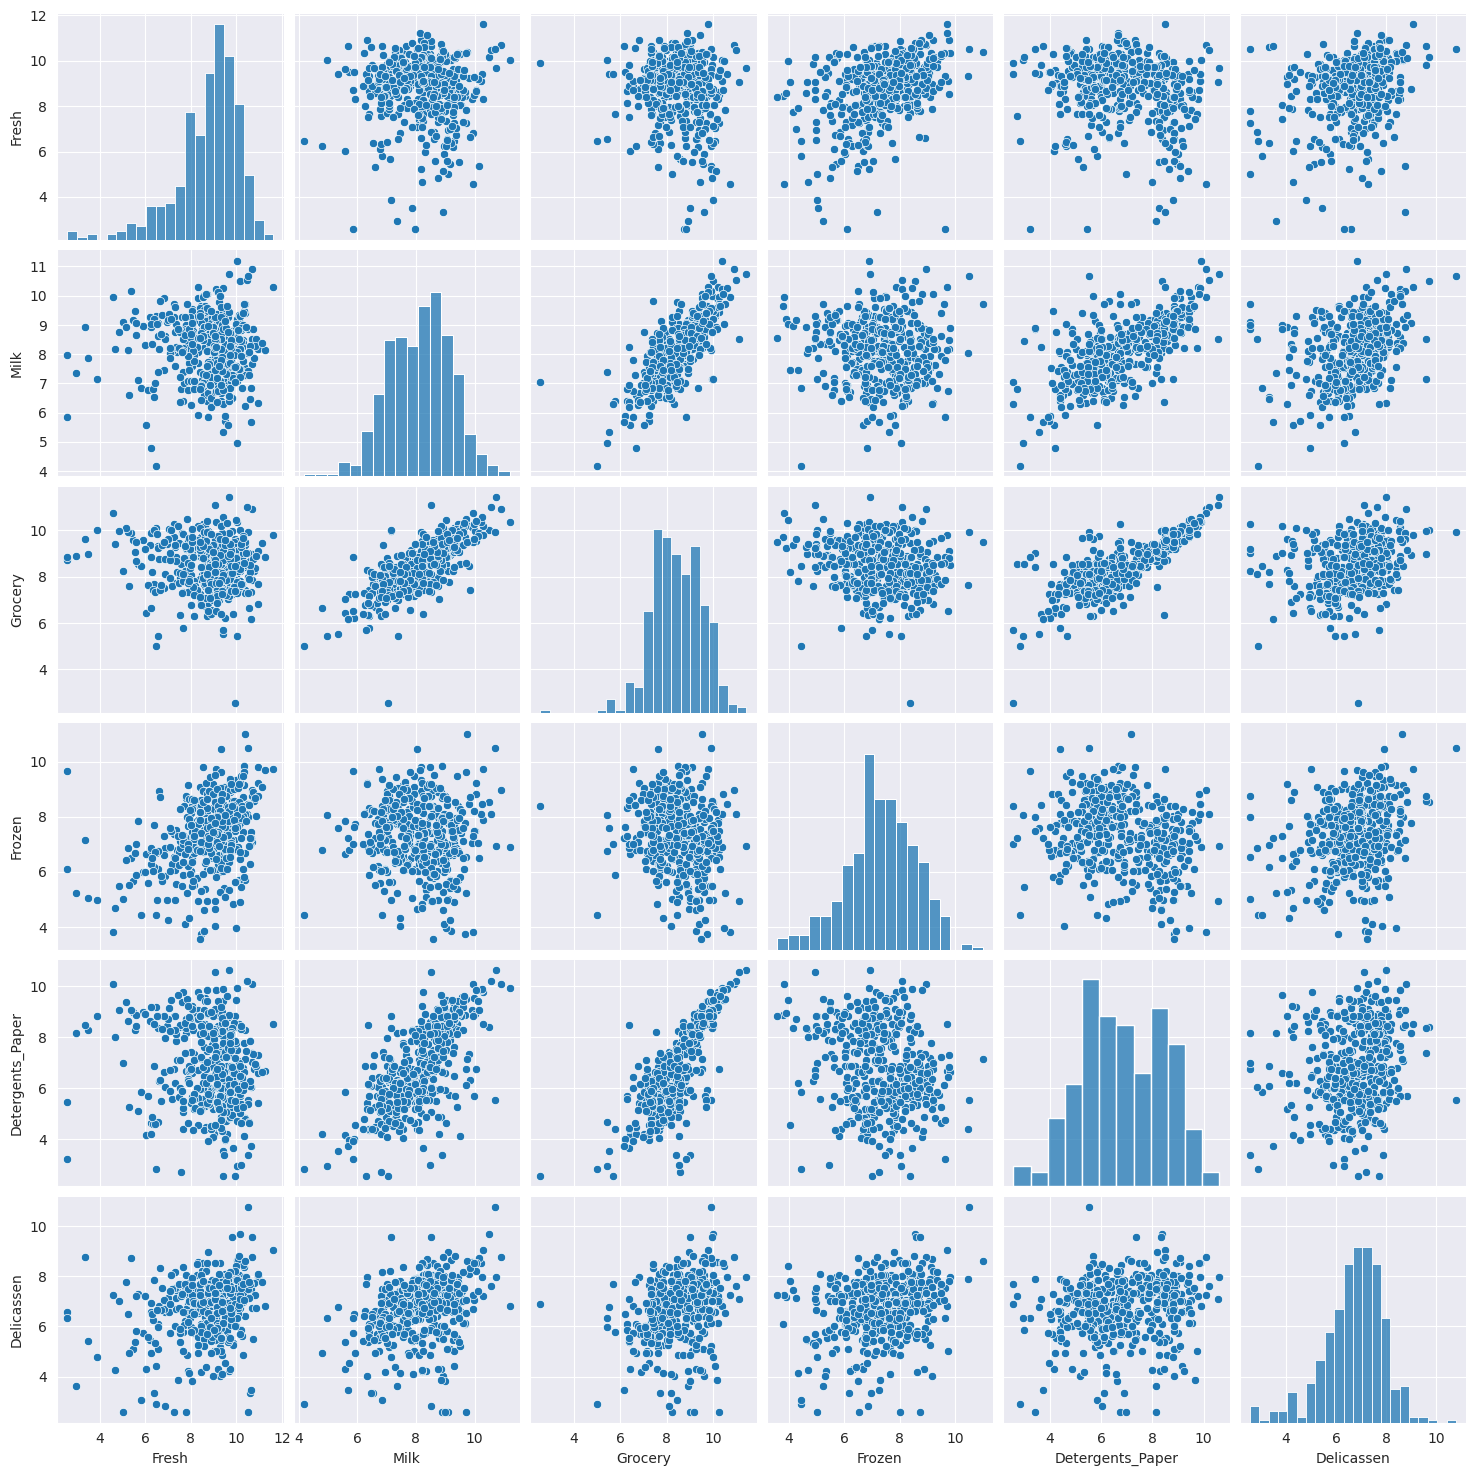

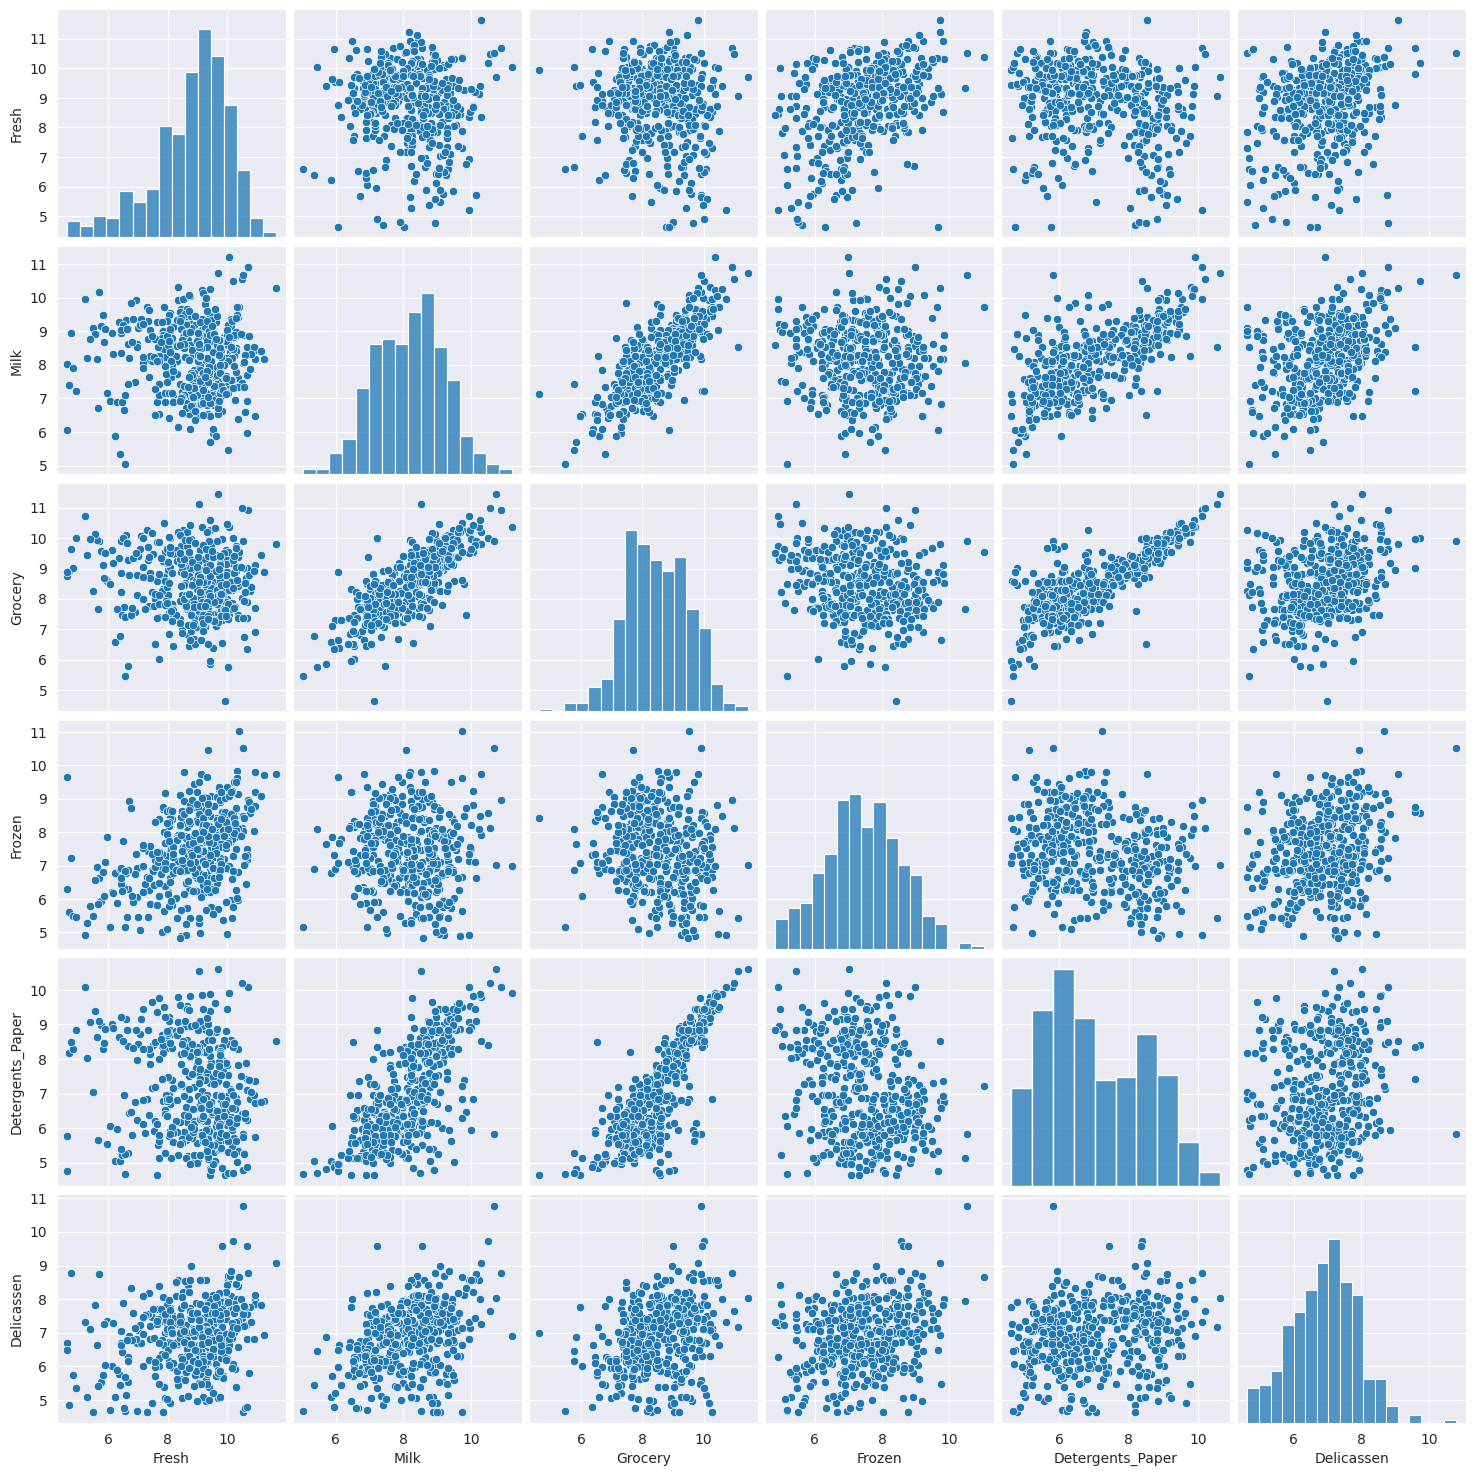

In [ ]:
sns.pairplot(data=np.log(X + 1))
sns.pairplot(data=np.log(X + 10))
sns.pairplot(data=np.log(X + 100))

In [ ]:
X_arr = np.log(X_arr + 10)

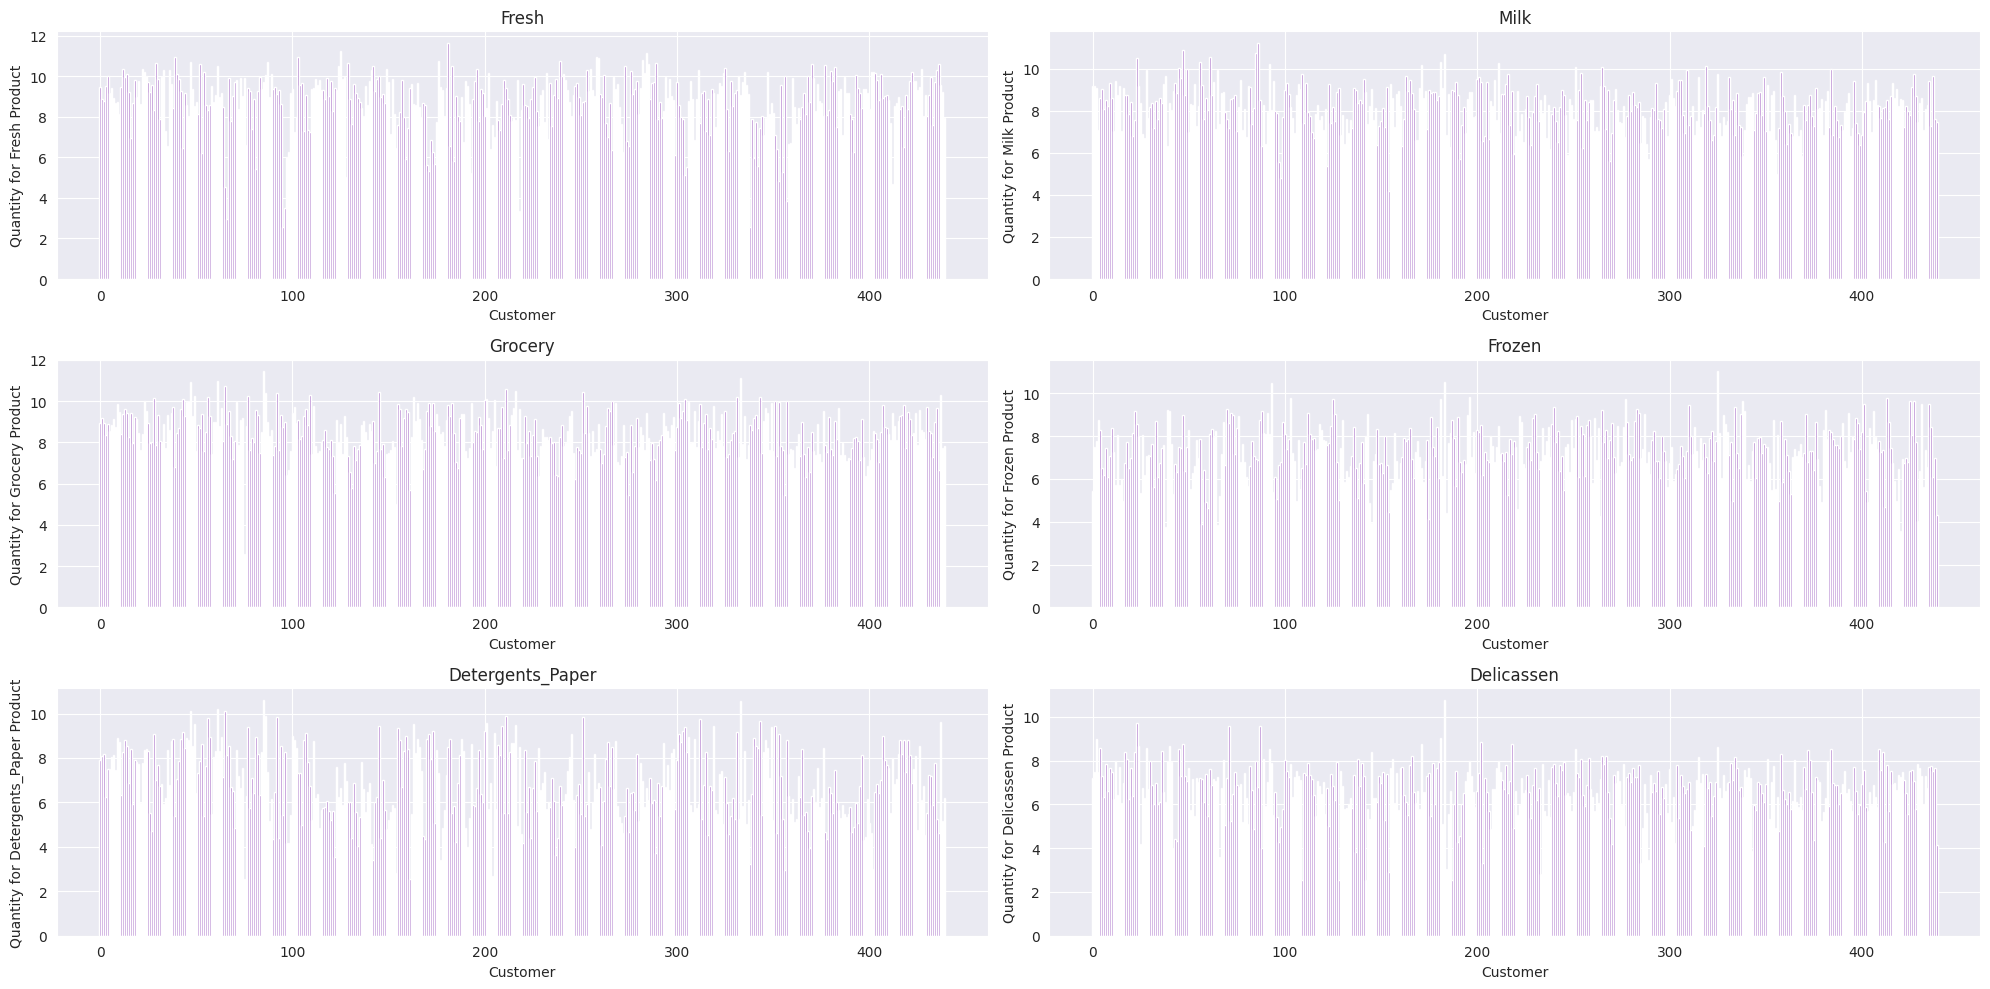

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

for idx in range(X_arr.shape[1]):
    row = idx // 2
    col = idx % 2

    column_data = X_arr[:, idx] # len == 440

    ax[row, col].bar(np.arange(len(column_data)), column_data, color='#AD78CB')
    ax[row, col].set_xlabel('Customer')
    ax[row, col].set_ylabel('Quantity for {} Product'.format(X.columns[idx]))
    ax[row, col].set_title('{}'.format(X.columns[idx]))

plt.tight_layout()
plt.show()

# 2. Detecting Anomalies

## 2.1. Hard minimum

### 2.1.1. Hard_min()

In [ ]:
def hard_min(data):
    squared_distances = scipy.spatial.distance.cdist(data, data) ** 2 # $1 Hard min should use the square euclidean distance
    np.fill_diagonal(squared_distances, np.nan)
    hardmins = np.nanmin(squared_distances, axis=1)
    return hardmins

### 2.1.2. Top 10 Anomalies

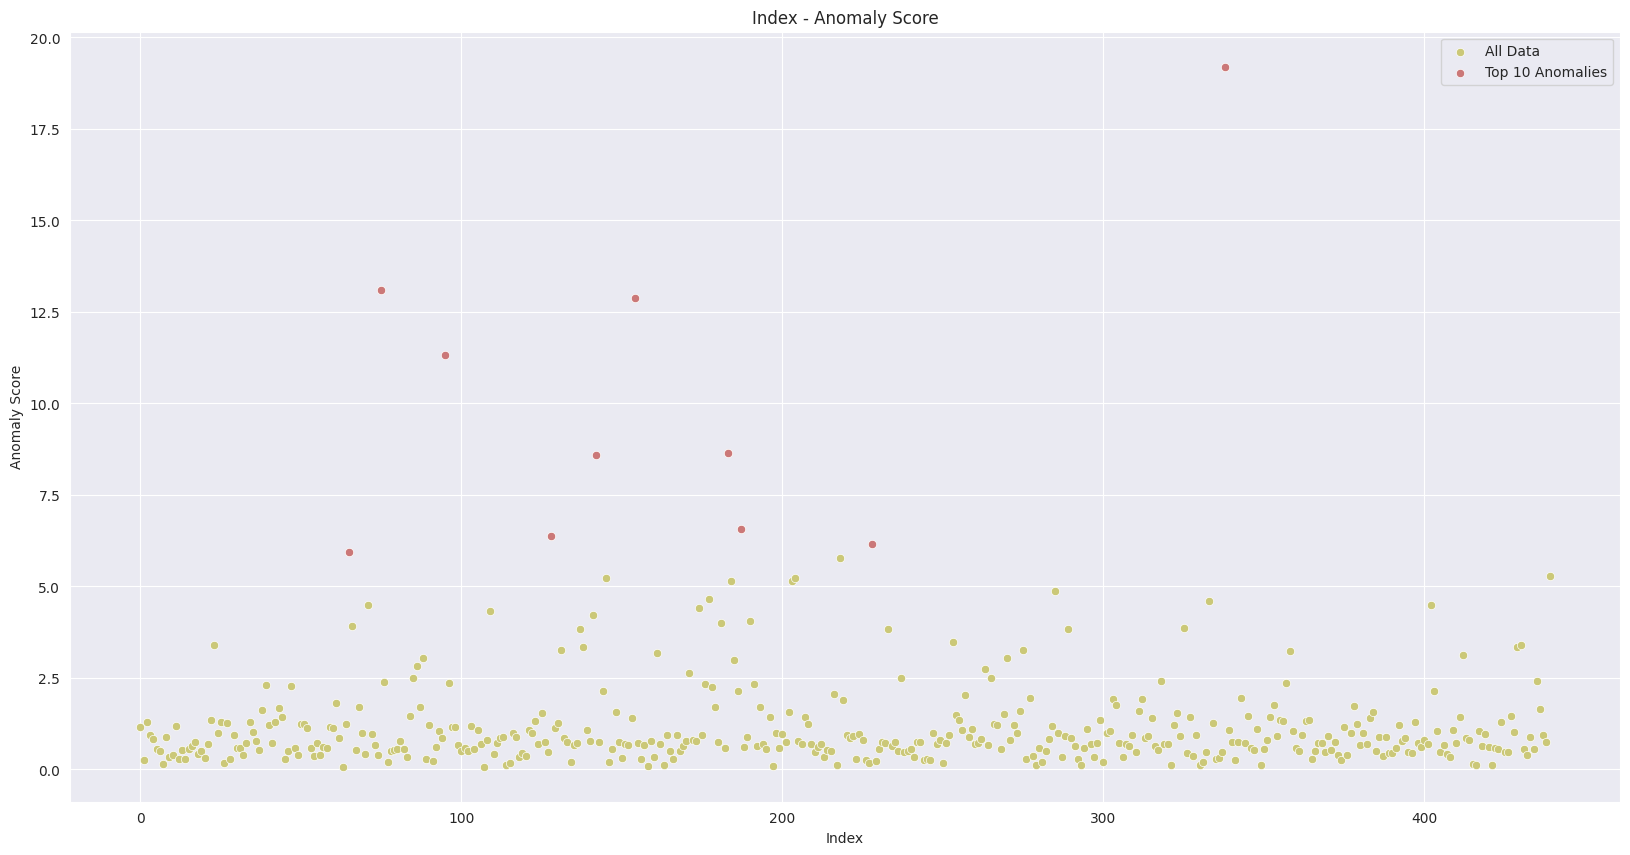

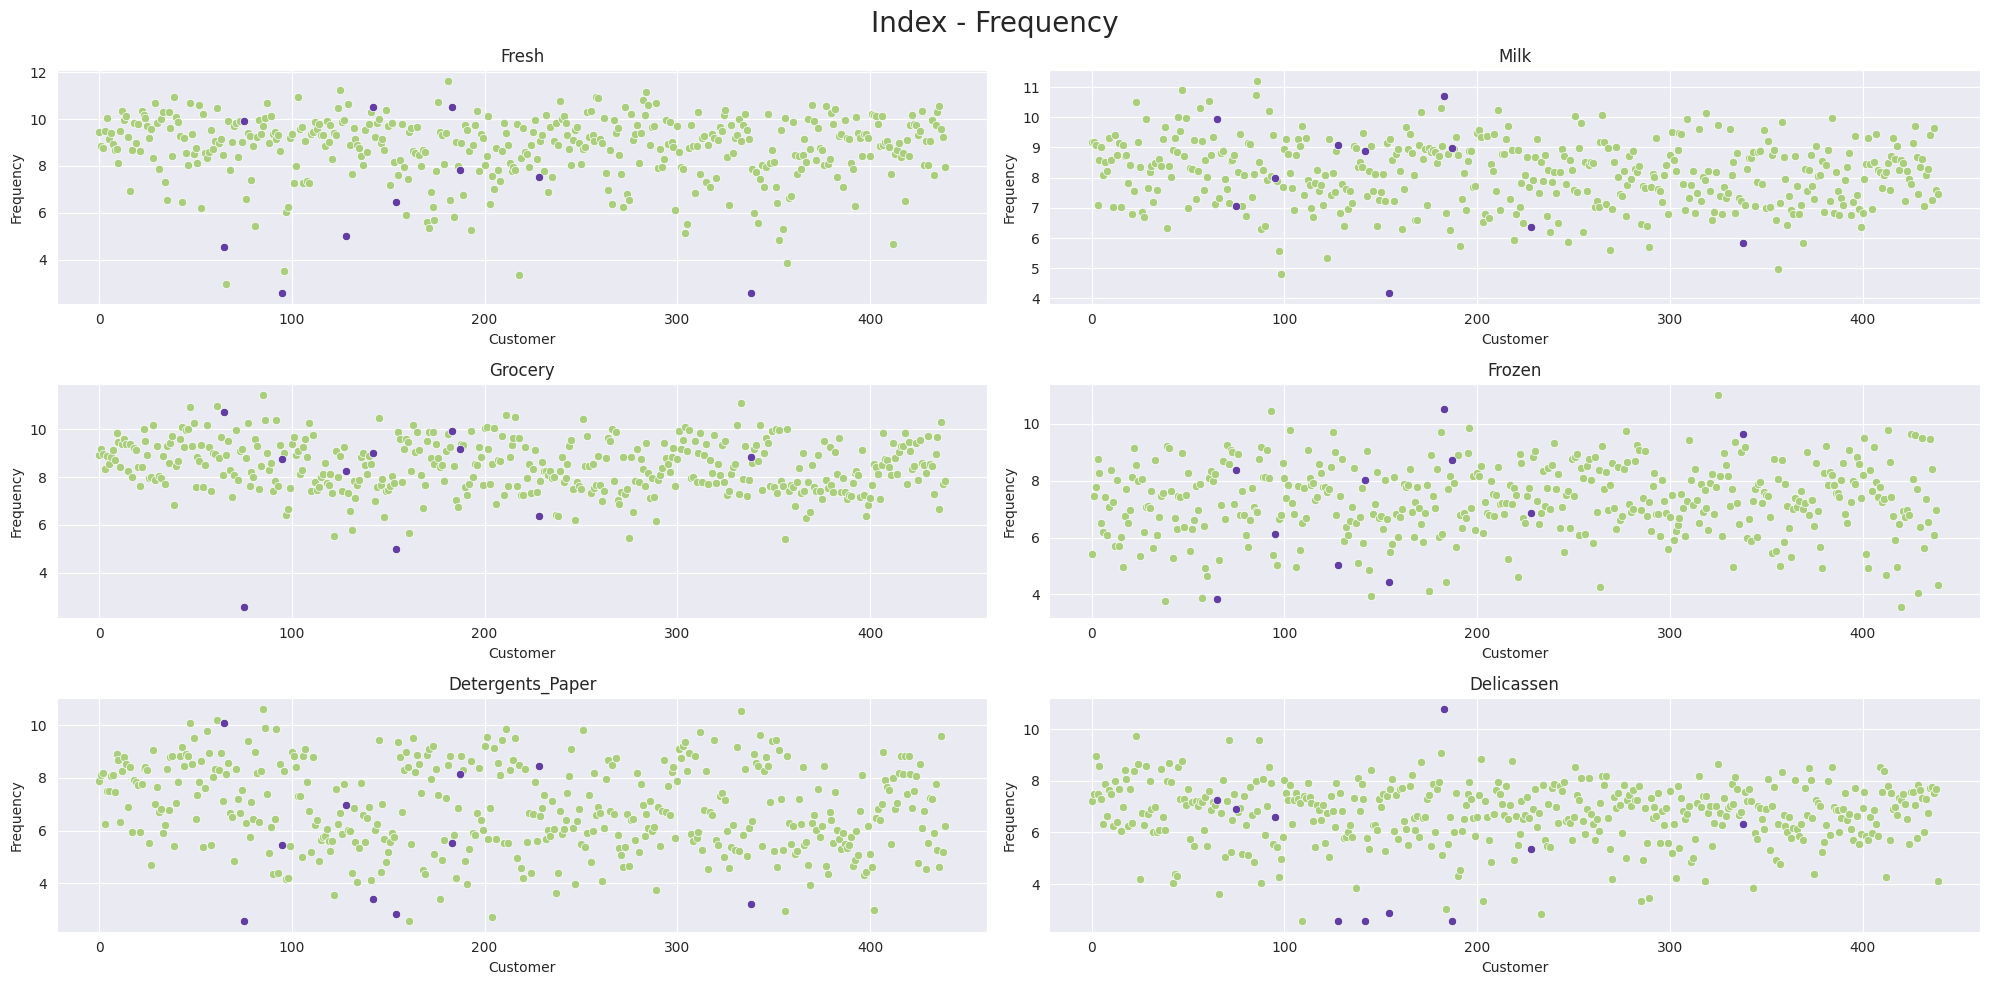

,Num. of the customer,Score,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,339,19.200908,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937
1,76,13.094220,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642
2,155,12.870776,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372
3,96,11.329252,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861
4,184,8.636633,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977
5,143,8.582687,10.519916,8.876545,9.019543,8.008033,3.401197,2.564949
6,188,6.556690,7.803027,8.988696,9.193092,8.744966,8.151622,2.564949
7,129,6.389484,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949
8,229,6.165231,7.538495,6.375025,6.366470,6.866933,8.470521,5.361292
9,66,5.947661,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525


In [ ]:
# top 10 (anomaliness)
def top10_table(data, y_js):
    columns = ["Num. of the customer", "Score", "Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
    dic = {k: [] for k in columns}
    top_10_indices = np.argsort(y_js)[-10:][::-1]
    for idx in top_10_indices:
        # index + 1 = num. of the customer
        dic["Num. of the customer"].append(idx + 1)
        dic["Score"].append(y_js[idx])
        dic["Fresh"].append(data[idx][0])
        dic["Milk"].append(data[idx][1])
        dic["Grocery"].append(data[idx][2])
        dic["Frozen"].append(data[idx][3])
        dic["Detergents_Paper"].append(data[idx][4])
        dic["Delicassen"].append(data[idx][5])
    table = pd.DataFrame(dic)

    # Visualize the top 10 anomaly scores
    plt.figure(figsize=(20, 10))
    sns.scatterplot(x=range(len(y_js)), y=y_js, color='#CBC878', label='All Data')
    sns.scatterplot(x=top_10_indices, y=table["Score"], color='#CB7878', label='Top 10 Anomalies')
    plt.xlabel('Index')
    plt.ylabel('Anomaly Score')
    plt.title('Index - Anomaly Score')
    plt.legend()
    plt.show()

    # visualize the top 10 anomaly data for each product (the spending)
    plt.figure(figsize=(20, 10))
    plt.suptitle('Index - Frequency',fontsize=20)
    for i in range(data.shape[1]):
        plt.subplot(3, 2, i + 1)
        sns.scatterplot(x=range(data.shape[0]), y=data[:, i], color='#AACE7E')
        sns.scatterplot(x=top_10_indices, y=data[top_10_indices, i], color='#613DA4')
        plt.xlabel('Customer')
        plt.ylabel('Frequency')
        plt.title(columns[i + 2])
    plt.tight_layout()
    plt.show()

    return table

y_js = hard_min(X_arr)
top10_table(X_arr, y_js)

## 2.2. Soft minimum for reproducibility

### 2.2.1. soft_min()

In [ ]:
def soft_min(data, gamma):
    squared_distances = scipy.spatial.distance.cdist(data, data) ** 2
    np.fill_diagonal(squared_distances, np.nan)
    N = data.shape[0]
    softmins = np.zeros(N)
    for j in range(N):
        softmins[j] = (-1 / gamma) * np.log(np.sum(np.exp(-gamma * squared_distances[j, np.arange(N) != j])) / (N-1))
    return softmins

### 2.2.2. Bootstrapping
sample size : 440 \
the number of sampling: 1000 \
(with repetition)

In [ ]:
def compute_anomaly_avg_and_spread(data, gamma, num_bootstrap):
    N = data.shape[0] # 440
    samples_y_js = np.zeros((N, num_bootstrap))
    for i in range(num_bootstrap):
        sample_indices = np.random.choice(N, N, replace=True)
        bootstrap_sample = data[sample_indices]
        squared_distances = scipy.spatial.distance.cdist(bootstrap_sample, bootstrap_sample) ** 2 # $
        for j in range(N):
            distance = np.array(squared_distances[j, np.arange(N) != j])
            samples_y_js[sample_indices[j], i] = (-1 / gamma) * np.log(np.sum(np.exp(-gamma * distance))) / (N)

    # Compute the mean and standard deviation along the rows
    samples_y_js = np.ma.masked_equal(samples_y_js, 0)
    y_js_avg = np.mean(samples_y_js, axis=1).filled(0)
    y_js_spread = np.std(samples_y_js, axis=1).filled(0)
    return y_js_avg, y_js_spread

In [ ]:
def evaluate_gamma(data, gammas, num_bootstrap):
    results = {}
    for gamma in gammas:
        anomaly_avg, anomaly_spread = compute_anomaly_avg_and_spread(data,gamma, num_bootstrap)
        results[gamma] = (anomaly_avg, anomaly_spread)
    return results

def plot_results(results):
    for gamma, (avg, spread) in results.items():
        top_10_indices = np.argsort(avg)[-10:]
        top_10_avg = avg[top_10_indices]
        top_10_spread = spread[top_10_indices]

        plt.figure(figsize=(10, 6))
        plt.errorbar(range(len(avg)), avg, yerr=spread, fmt='o', ecolor= 'g', color='r',elinewidth=1, ms=1, label=f'Gamma={gamma}')
        plt.errorbar(top_10_indices, top_10_avg, yerr=top_10_spread, fmt='o', ecolor='b', color='m', elinewidth=1, ms=5, label='Top 10 Anomalies')
        plt.xlabel('Instance Index')
        plt.ylabel('Anomaly Score')
        plt.legend()
        plt.title(f'Instance Index - Anomaly Score for Gamma={gamma}')
        plt.show()

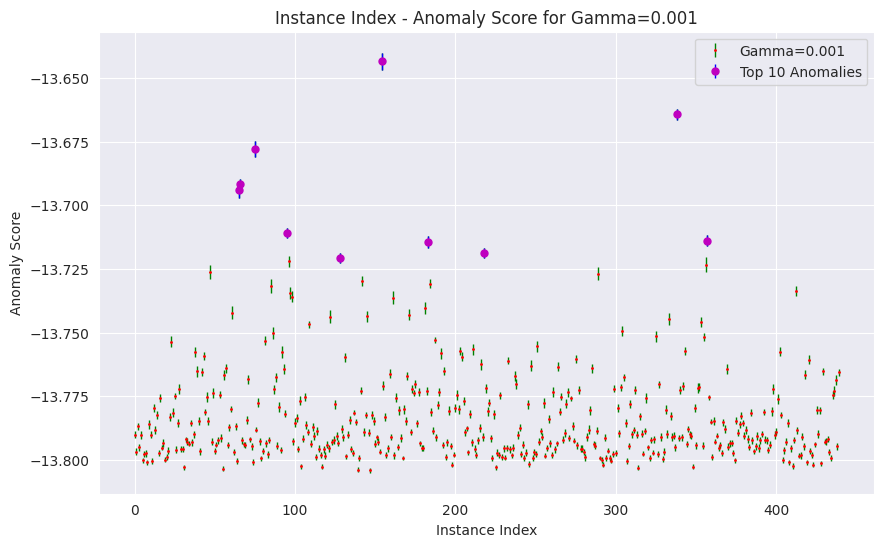

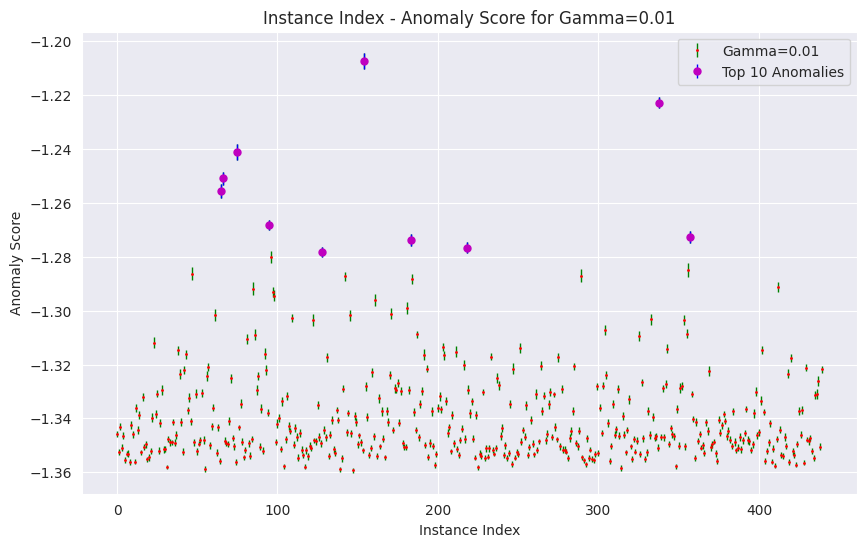

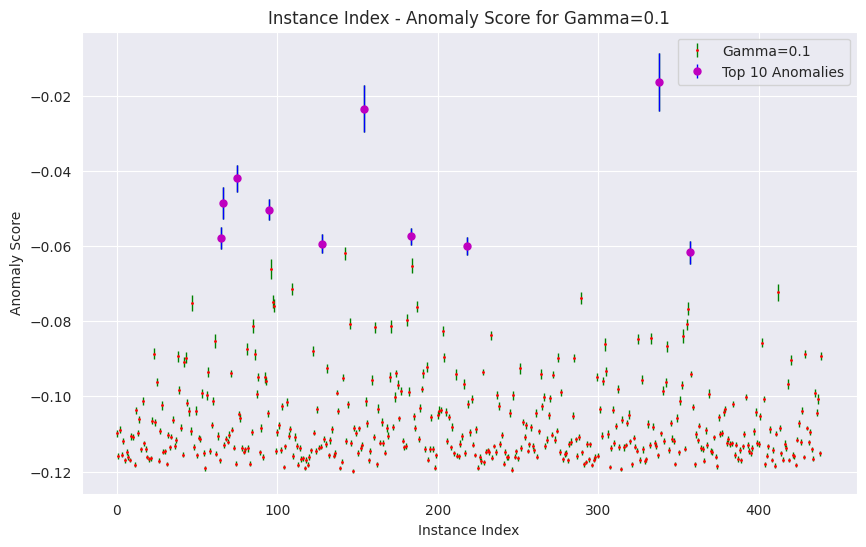

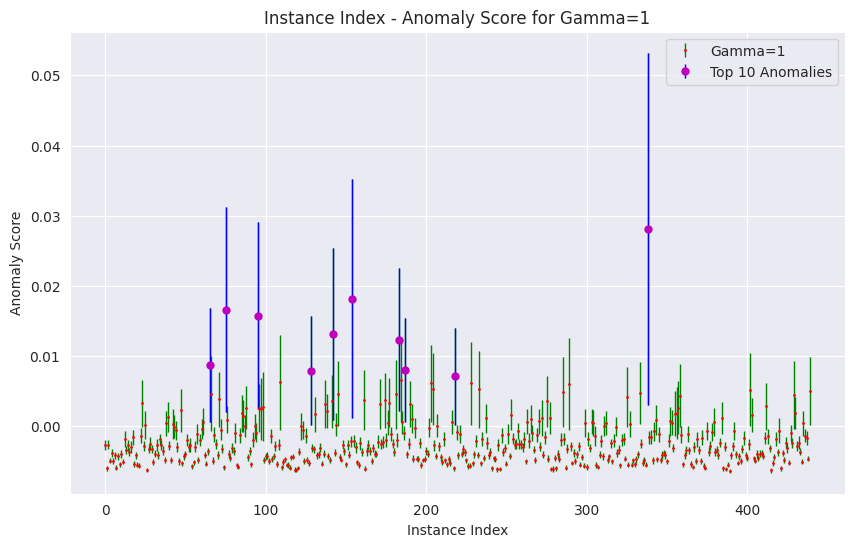

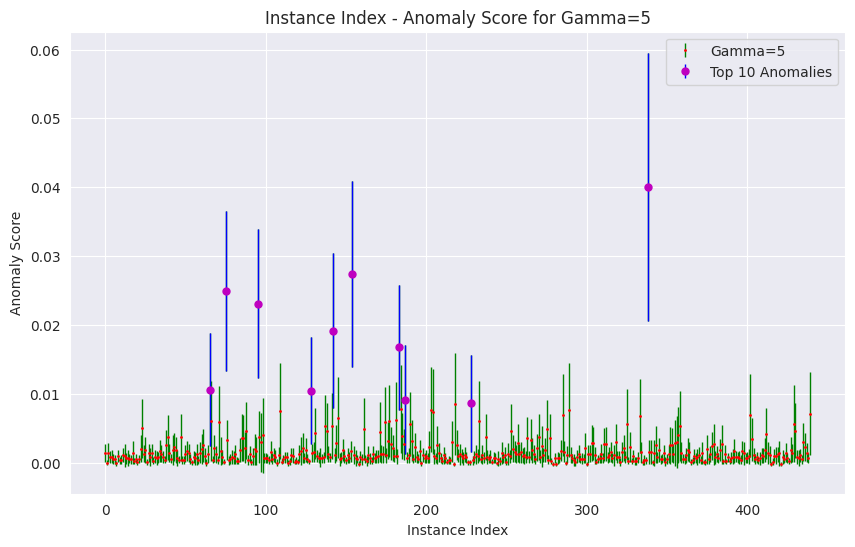

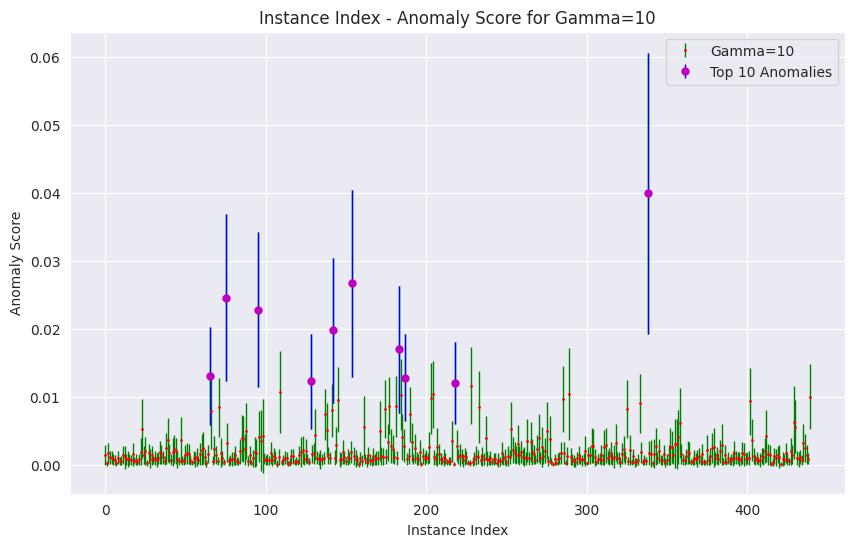

In [ ]:
gammas = [0.001, 0.01, 0.1, 1, 5, 10]
results = evaluate_gamma(X_arr, gammas, 1000)
plot_results(results)

Looks like the separability is the best with gamma == 0.1.

### 2.3.3. Top 10 Anomalies with Gamma = 0.1

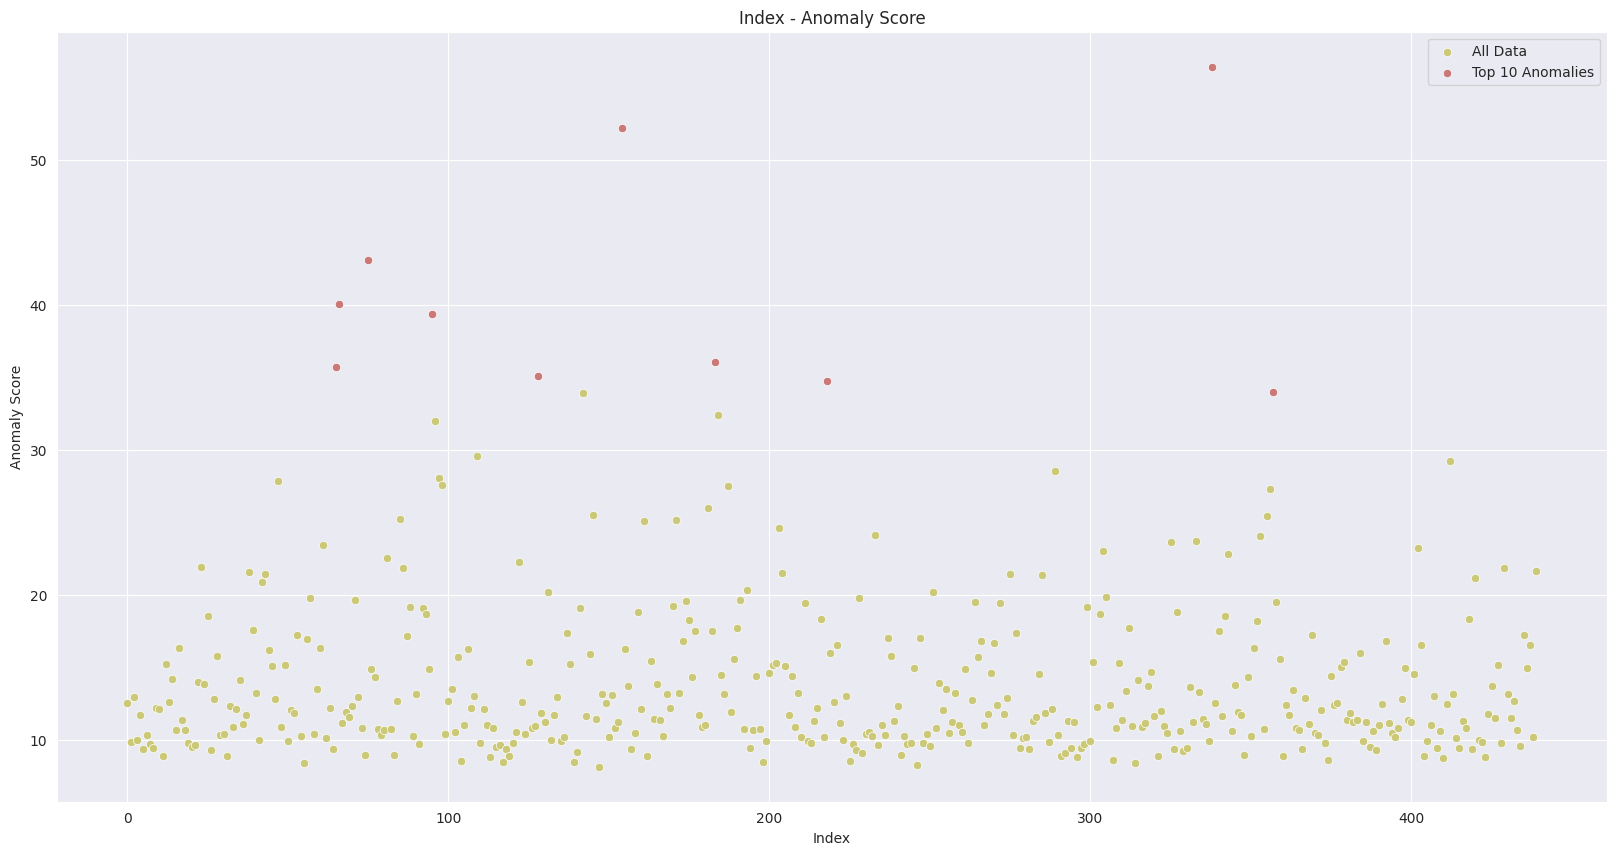

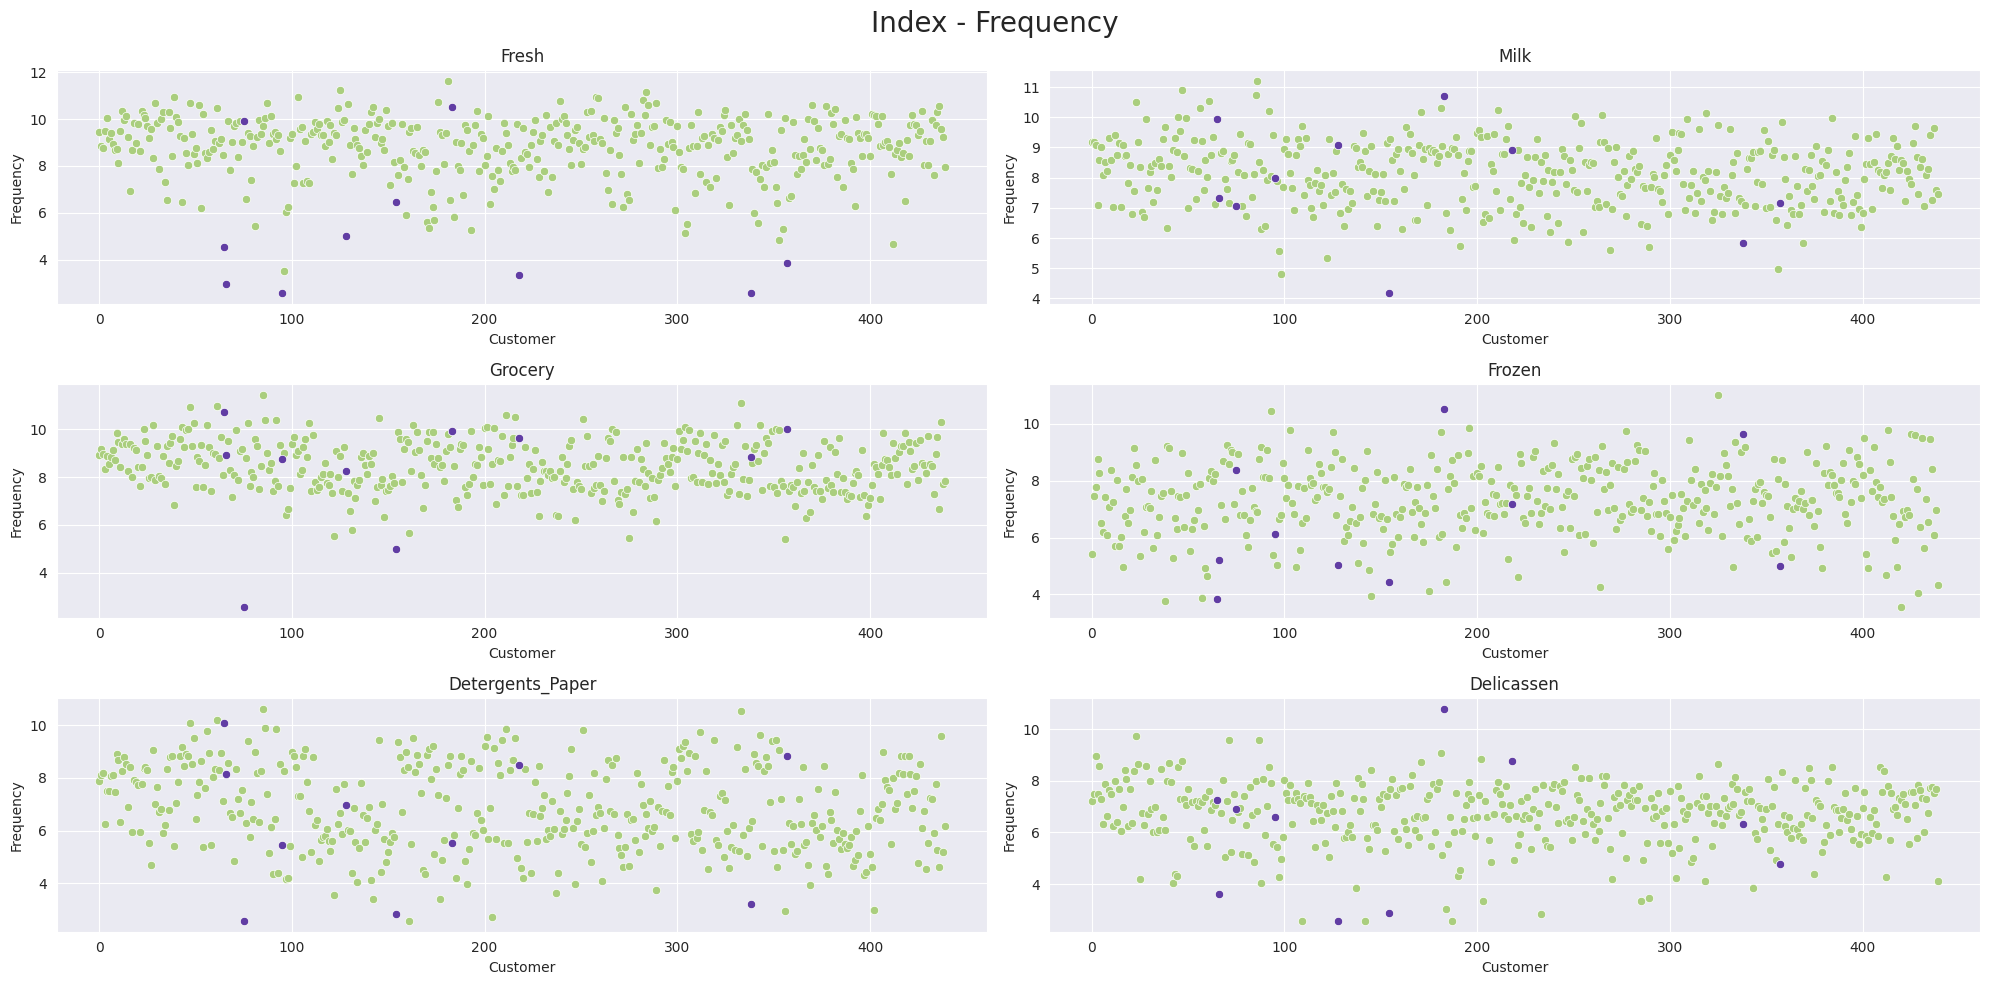

,Num. of the customer,Score,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,339,56.412571,2.564949,5.837730,8.858084,9.655731,3.218876,6.327937
1,155,52.169549,6.448889,4.174387,4.990433,4.442651,2.833213,2.890372
2,76,43.100336,9.923682,7.044905,2.564949,8.393216,2.564949,6.892642
3,67,40.038439,2.944439,7.342132,8.912877,5.220356,8.154213,3.610918
4,96,39.386764,2.564949,7.982758,8.742255,6.109248,5.451038,6.577861
5,184,36.045089,10.514801,10.691035,9.912447,10.506272,5.517453,10.777977
6,66,35.747192,4.553877,9.950800,10.732869,3.828641,10.095801,7.267525
7,129,35.102803,5.010635,9.088963,8.251403,5.023881,6.977281,2.564949
8,219,34.741580,3.332205,8.924523,9.630037,7.166266,8.477828,8.761237
9,358,34.017930,3.850148,7.158514,10.011534,4.990433,8.818334,4.787492


In [ ]:
y_js = soft_min(X_arr, gamma = 0.1)
top10_table(X_arr, y_js)

# 3. Getting Insights into Anomalies

## 3.1. Relation Between Anomalies and Meta-Data

### 3.1.1. Based on Channel

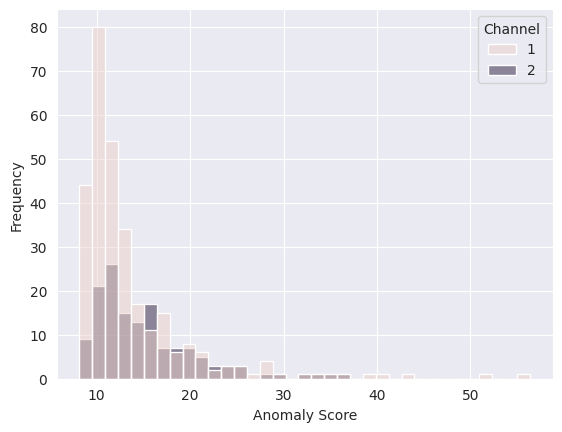

In [ ]:
y_js = soft_min(X_arr, gamma = 0.1) # $ Why the scores are different from the experiment with bootstrapping?

channel = np.array(df["Channel"])
tmp_df = pd.DataFrame({"Channel": channel, "Anomaly Score": y_js})
sns.histplot(data = tmp_df, x = "Anomaly Score", hue = "Channel")
plt.ylabel("Frequency")
plt.show()

### 3.1.2. Based on Region

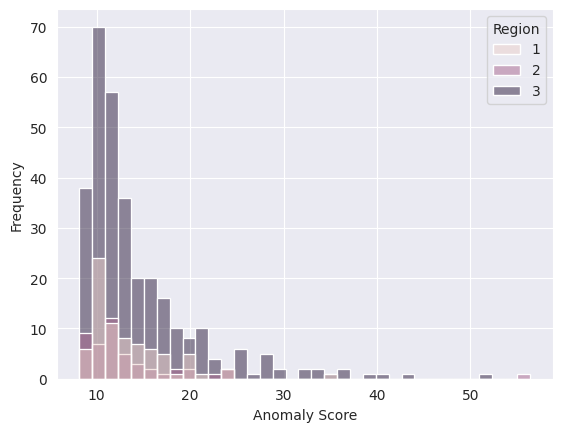

In [ ]:
region = np.array(df["Region"])
tmp_df = pd.DataFrame({"Region": region, "Anomaly Score": y_js})
sns.histplot(data = tmp_df, x = "Anomaly Score", hue = "Region")
plt.ylabel("Frequency")
plt.show()

## 3.2. Identifying Input Features that Drive Anomaly

In [ ]:
def compute_contribution_to_anomaly_score(data, gamma):
    num_instances = len(data) # 440

    squared_distances = scipy.spatial.distance.cdist(data, data) ** 2 # $
    anomaly_scores = soft_min(data, gamma)
    contributions = np.zeros((num_instances, num_instances))
    for j in range(num_instances):
        # Exclude the self-distance
        distance_j = np.delete(squared_distances[j], j)
        total_exp_distances = np.sum(np.exp(-gamma * distance_j))
        for i in range(num_instances):
            if i != j:
                exp_distances =np.exp(-gamma * squared_distances[j][i])
                contributions[j][i] = exp_distances / total_exp_distances * anomaly_scores[j]

    return contributions

def propagate_contributions_to_input_features(data, contributions):
    num_instances, num_features = data.shape
    feature_contributions = np.zeros((num_instances, num_features))

    for j in range(num_instances):
        for i in range(num_features):
            feature_sum = 0
            for k in range(num_instances):
                features_distance = data[k] - data[j]
                if k != j and np.linalg.norm(features_distance) !=0:
                    feature_sum += (np.abs(features_distance)[i]) ** 2 / np.linalg.norm(features_distance) ** 2 * contributions[j][k]
            feature_contributions[j, i] = feature_sum
    return feature_contributions

contributions = compute_contribution_to_anomaly_score(X_arr, 0.1)
feature_contributions = propagate_contributions_to_input_features(X_arr, contributions)


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

# Load your data
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(X_arr)
df = pd.DataFrame(data_2d, columns=['t_SNE 1', 't_SNE 2'])
df['index'] = df.index
top_10_indices = np.argsort(y_js)[-10:]
df['colors'] = ['anomalies' if i in top_10_indices else 'non_anomalies' for i in df.index]
color_discrete_map = {'anomalies': 'blue', 'non_anomalies': 'orange'}
# Create the scatter plot with t-SNE results
fig = px.scatter(df, x='t_SNE 1', y='t_SNE 2', hover_data=['index'], color='colors',color_discrete_map=color_discrete_map, labels={'t_SNE 1': 't-SNE 1', 't_SNE 2': 't-SNE 2'})
fig.update_traces(marker=dict(size=8))

# Define the modal for displaying histograms
modal = html.Div(
    [
        dbc.Modal(
            [
                dbc.ModalHeader("Feature Contributions"),
                dbc.ModalBody(
                    dcc.Graph(id='histogram')
                ),
                dbc.ModalFooter(
                    dbc.Button("Close", id="close-modal", className="ml-auto")
                ),
            ],
            id="modal",
            size="lg",
            centered=True,
        ),
    ]
)

# Define the app layout
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
app.layout = dbc.Container([
    html.H1("t-SNE Scatter Plot"),
    dcc.Graph(id='scatter-plot', figure=fig),
    modal
])

# Define callback to show modal and update histogram on click
@app.callback(
    [Output("modal", "is_open"), Output('histogram', 'figure')],
    [Input("scatter-plot", "clickData"), Input("close-modal", "n_clicks")],
    [dash.dependencies.State("modal", "is_open")],
)
def toggle_modal(click_data, n_clicks, is_open):
    ctx = dash.callback_context
    if ctx.triggered:
        prop_id = ctx.triggered[0]["prop_id"]
        if prop_id == "scatter-plot.clickData":
            if click_data:
                point_index = click_data["points"][0]["customdata"][0]
                customes_spending = array_customes[point_index]
                # Retrieve feature contributions
                feature_contribution = feature_contributions[point_index]
                #create ylabel
                y_labels = [f"{categories[i]} (x{i}= {customes_spending[i]})" for i in range(len(categories))]
                # Create histogram
                histogram_fig = go.Figure(go.Bar(x=feature_contribution,y=y_labels,orientation='h',marker_color='red')
                histogram_fig.update_layout(title=f"Feature Contributions for Index {point_index}")
                return not is_open, histogram_fig
    return is_open, dash.no_update

if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>